In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor


/home/syang127/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Bamma Maata Bangaru Baata (1990): 7.500000
The 61st Annual Golden Globe Awards (2004): 5.100000
Con la música a otra parte (1975): 3.400000
Funeralii fericite (2013): 8.100000
Zoom, Zoom, Superman! (1973): 5.600000
Fever Lake (1996): 2.900000
El aroma del Copal (1997): 4.200000
The Time Machine (1978): 5.400000
The Science of Doctor Who (2012): 8.200000
Section 60: Arlington National Cemetery (2008): 7.300000
Svobodna si. Odloci se. (2000): 6.700000


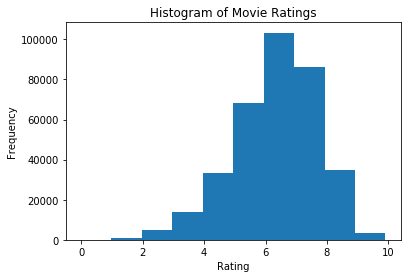

In [2]:
# Read in movies with ratings
movie_to_rating_hash = {}
with open('movie_rating.txt','r',encoding = "ISO-8859-1") as f:
    counter = 0
    for line in f:
        line_split = line.split('\t\t')
        movie_title = line_split[0]
        movie_rating = float(line_split[1])
        movie_to_rating_hash[movie_title] = movie_rating
        
for n,i in enumerate(movie_to_rating_hash.keys()):
    if n > 10:
        break
    print("%s: %f" % (i,movie_to_rating_hash[i]))

plt.hist(movie_to_rating_hash.values())
plt.ylabel('Frequency')
plt.xlabel('Rating')
plt.title('Histogram of Movie Ratings')
plt.show()

In [3]:
# Generate a dictionary mapping each actor/actress to a set of movies to which they performed,
# and generate a dictionary mapping each movie to a set of actors/actresses

movie_to_cast_hash = {}
cast_to_movies_hash = {}

counter = 0
with open('clean_cast_movies.txt','r') as cleansed:
    counter = 0
    for line in cleansed:
        if counter % 10000 == 0:
            print("%d" % (counter))
        line_split = line.split('\t\t')
        for n,i in enumerate(line_split):
            line_split[n] = line_split[n].rstrip()
        movies = set(line_split[1:])
        cast_name = line_split[0]
        cast_to_movies_hash[cast_name] = movies
        for m in movies:
            if m not in movie_to_cast_hash.keys():
                movie_to_cast_hash[m] = set ()
            movie_to_cast_hash[m].add(cast_name)
        counter += 1

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000


In [24]:
# Create a dictionary that maps movie to its neighboring movies' scores

In [29]:
t1 = time.time()
movie_to_neighbors = {}

for n,movie in enumerate(movie_to_rating_hash.keys()):
    if movie in movie_to_cast_hash.keys():
        neighbor_set = set()
        cast = movie_to_cast_hash[movie]
        for actor in cast:
            if actor in cast_to_movies_hash.keys():
                neighbor_set = neighbor_set | cast_to_movies_hash[actor]
                movie_to_neighbors[movie] = neighbor_set
print("Generated movie_to_neighbors hash in %f sec." % (time.time()-t1))

Generated movie_to_neighbors hash in 70.547171 sec.


In [30]:
# Sanity check for movie_to_neighbors

In [33]:
for n,i in enumerate(movie_to_neighbors.keys()):
    if n > 2:
        break
    print("%s: %s\n" % (i,movie_to_neighbors[i]))

Bamma Maata Bangaru Baata (1990): {'Lankeshwarudu (1989)', 'Vikram (1991)', 'Gaganam (2011)', 'Neeku Naaku Pellanta (1988)', 'Mr. Pellam (1993)', 'Manam (2014/I)', 'Vande Mataram (1985)', 'Prema Khaidi (1990)', 'Bommarillu (2006)', 'Haiwan (1998)', 'Collector Garu (1997)', 'Mechanic Alludu (1993)', 'Athidhi (2007)', 'Sarangadhara (1957)', 'Subhakankshalu (1998)', 'Nala Damayanti (1957)', 'Shock (2006)', 'Premaku Velaayera (1999)', 'Mastari Kapuram (1990)', 'Hitler (1997)', 'Iddaru Attala Muddula Alludu (2006)', 'Prema (1989)', 'Pattukondi Chuddam (1997)', 'Manthrigari Viyyankudu (1983)', 'Gudu Gudu Gunjam (2010)', 'Nippu (2012)', 'Ela Cheppanu (2003)', 'Entha Bagundo (2002)', 'Mathru Devo Bhava (1993)', 'Ammulu (2003)', 'Bindaas (2010)', 'Naa Manasukemaindi (2008)', 'Aa Aaa Ee Eee: Athanu Aame Inthalo Eeme (2009)', 'Varudu (2010)', 'Aa Naluguru (2004)', 'Adavi Donga (1985)', 'Chinna Kannamma (1993)', 'Bhadradri (2008)', 'Chakram (2005)', 'Madam (1993)', 'Junction (2009/II)', 'Kotha Ban

In [44]:
t1 = time.time()
movie_to_neighbor_ratings = {}

for n,movie in enumerate(movie_to_neighbors.keys()):
    neighbor_ratings = []
    for neighbor in movie_to_neighbors[movie]:
        if neighbor in movie_to_rating_hash.keys():
            neighbor_ratings.append(movie_to_rating_hash[neighbor])
    movie_to_neighbor_ratings[movie] = neighbor_ratings
print("Generated movie_to_neighbor_ratings hash in %f sec." % (time.time()-t1))

Generated movie_to_neighbor_ratings hash in 75.812001 sec.


In [ ]:
# Sanity check for movie_to_neighbor_ratings

In [47]:
print(len(movie_to_neighbor_ratings))
for n,i in enumerate(movie_to_neighbor_ratings.keys()):
    if n > 2:
        break
    print("%s: %s\n" % (i,movie_to_neighbor_ratings[i]))

191796
Bamma Maata Bangaru Baata (1990): [6.2, 7.2, 7.9, 8.3, 6.3, 6.4, 8.3, 7.2, 6.0, 5.7, 6.2, 7.0, 5.4, 6.0, 6.0, 7.6, 6.9, 3.0, 3.7, 6.0, 8.5, 6.9, 3.5, 8.3, 7.4, 6.6, 5.6, 6.9, 4.8, 6.3, 4.5, 7.0, 7.4, 7.8, 7.9, 5.0, 7.1, 6.8, 5.8, 7.1, 5.2, 5.5, 5.4, 6.6, 5.7, 6.8, 4.8, 3.2, 8.1, 7.4, 3.4, 7.2, 6.0, 7.3, 5.6, 4.6, 6.5, 3.2, 8.0, 7.8, 7.7, 4.0, 7.6, 4.4, 4.8, 3.1, 7.1, 7.3, 4.9, 5.4, 3.4, 6.0, 7.5, 8.2, 5.7, 7.1, 7.6, 7.1, 7.5, 7.0, 6.4, 4.3, 6.0, 4.0, 5.1, 7.7, 7.7, 6.0, 7.6, 7.2, 3.4, 6.9, 7.0, 5.6, 7.4, 8.2, 6.9, 7.3, 4.2, 5.1, 8.3, 8.4, 4.5, 6.6, 3.8, 3.9, 7.4, 8.3, 5.6, 5.2, 6.9, 6.3, 6.9, 5.8, 4.7, 6.5, 6.3, 7.8, 3.2, 4.3, 7.0, 7.3, 5.2, 6.9, 8.5, 5.1, 6.1, 6.3, 5.3, 5.0, 4.8, 3.6, 5.1, 4.6, 7.0, 5.9, 5.4, 7.6, 6.8, 6.2, 3.6, 2.2, 4.1, 2.7, 6.5, 5.2, 7.4, 7.2, 6.8, 8.0, 7.5, 7.8, 8.0, 4.4, 6.5, 6.3, 3.8, 3.6, 7.8, 4.9, 8.2, 4.6, 4.6, 6.9, 4.9, 6.3, 5.6, 6.1, 3.8, 4.4, 5.8, 7.0, 6.8, 3.9, 5.6, 6.2, 5.8, 4.3, 6.6, 3.9, 6.5, 7.2, 3.4, 7.3, 5.6, 7.1, 6.9, 2.8, 4.6, 5.3, 7.1, 6.8

In [46]:
# Save the movie to neighbor ratings file with pickle
# with open('movie_to_neighbor_ratings.pickle','wb') as f:
#     pickle.dump(movie_to_neighbor_ratings,f)

In [8]:
# Get statistics for feature vector
def get_feature_vector(sorted_weights):
    feature_vector = np.zeros((5,))
    feature_vector[0] = sorted_weights[round(len(sorted_weights)/4)]
    feature_vector[1] = sorted_weights[round(len(sorted_weights)/2)]
    feature_vector[2] = sorted_weights[round(3*len(sorted_weights)/4)]
    feature_vector[3] = np.mean(sorted_weights)
    feature_vector[4] = np.std(sorted_weights)
    return feature_vector


In [82]:
t1 = time.time()

# Generate training matrix
training_matrix = np.zeros((len(movie_to_neighbor_ratings),6))

movie_count = 0
for n,movie in enumerate(movie_to_neighbor_ratings.keys()):
    if len(movie_to_neighbor_ratings[movie]) >= 5:
        sorted_ratings = sorted(movie_to_neighbor_ratings[movie],reverse=True)
        feature_vector = get_feature_vector(sorted_ratings)
        training_matrix[movie_count,:-1] = feature_vector
        training_matrix[movie_count,-1] = movie_to_rating_hash[movie]
        movie_count += 1

training_matrix = training_matrix[:movie_count,:]
print("Generated training matrix in %f sec." % (time.time()-t1))

Generated training matrix in 34.973631 sec.


In [5]:
# with open('q12_train_matrix.pickle','wb') as f:
#     pickle.dump(training_matrix,f)

with open('q12_train_matrix.pickle','rb') as f:
    training_matrix = pickle.load(f)

In [6]:
def get_movie_weights(movie_title):
    actor_set = movie_to_cast_hash[movie_title]
    neighbor_set = set()
    for actor in actor_set:
        cur_neighbors = cast_to_movies_hash[actor]
        neighbor_set = neighbor_set | cur_neighbors
    cur_ratings = []
    for neighbor in neighbor_set:
        if neighbor in movie_to_rating_hash.keys():
            cur_ratings.append(movie_to_rating_hash[neighbor])
    sorted_ratings = sorted(cur_ratings,reverse=True)
    feature_vector = get_feature_vector(sorted_ratings)
    return feature_vector

In [9]:
linear_model = LinearRegression()
linear_model.fit(X=training_matrix[:,:-1],y=training_matrix[:,-1])
rmse = mean_squared_error(training_matrix[:,-1], linear_model.predict(training_matrix[:,:-1]))
print("Training RMSE: %f" % rmse)

batman_pred = linear_model.predict([get_movie_weights('Batman v Superman: Dawn of Justice (2016)')])[0]
mission_imp_pred = linear_model.predict([get_movie_weights('Mission: Impossible - Rogue Nation (2015)')])[0]
minions_pred = linear_model.predict([get_movie_weights('Minions (2015)')])[0]

truth_ratings = np.array([6.6,7.4,6.4])
predicted_ratings = np.array([batman_pred,mission_imp_pred,minions_pred])
rmse = mean_squared_error(truth_ratings, predicted_ratings)
print("Batman Prediction: %f" % batman_pred)
print("Mission Impossible Prediction: %f" % mission_imp_pred)
print("Minions Prediction: %f" % minions_pred)

Training RMSE: 1.362111
Batman Prediction: 6.532049
Mission Impossible Prediction: 6.340943
Minions Prediction: 7.100982
